   age agegroup  height   status  yearsmarried
0   21    adult     6.0   single            -1
1    2    child     3.0  married             0
2   18    adult     5.7  married            20
3  221  elderly     5.0  widowed             2
4   34    child    -7.0  married             3
   check_age  compare_age_year_married  check_status  check_age_agegroup
0       True                      True          True                True
1       True                      True          True                True
2       True                     False          True                True
3      False                      True          True                True
4       True                      True          True               False

Number of times each rule is satisfied: 
[4 4 5 4]


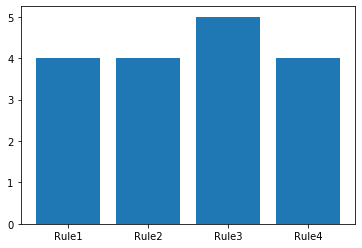

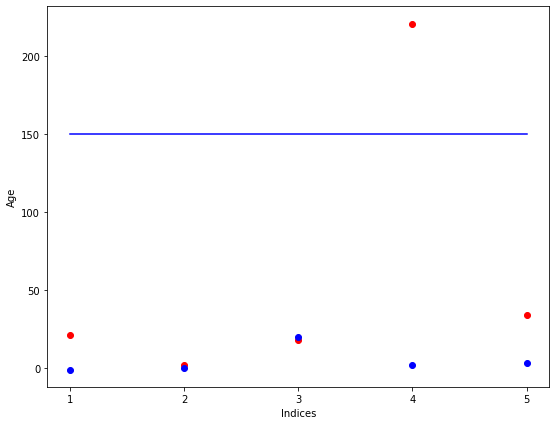

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('people.csv')
print(data)

def check_age(data):
    return data['age'].isin(range(0,151))
check_age(data)

def compare_age_year_married(data):
    return data['age'] > data['yearsmarried']
compare_age_year_married(data)

def check_status(data):
    return data['status'].isin(['single', 'married', 'widowed'])
check_status(data)

def check_age_agegroup(data):
    return ( (data['age'] < 18) & (data['agegroup'] == 'child') ) | ( (data['age'].isin(range(18,66))) & (data['agegroup'] == 'adult') ) | ( (data['age'] > 65) & (data['agegroup'] == 'elderly'))
check_age_agegroup(data)

E={"check_age":check_age(data), "compare_age_year_married":compare_age_year_married(data), "check_status":check_status(data), "check_age_agegroup":check_age_agegroup(data)}
temp=pd.DataFrame(E)
print(temp)
xlabels=["Rule1","Rule2","Rule3","Rule4"]
a=np.array([len(temp[i].loc[temp[i]==True]) for i in temp.columns[:]])
print("\nNumber of times each rule is satisfied: ")
print(a)


ylabels=a
y_positions = range(len(xlabels))

# Bar graph
plt.bar(y_positions, ylabels)
plt.xticks(y_positions, xlabels)
plt.show()

y=np.zeros(len(data['age']))
y=y+150

plt.figure(figsize=[9.0,7.0])
plt.plot([1,2,3,4,5],data['age'].values,'ro')
plt.plot([1,2,3,4,5],data['yearsmarried'].values,'bo')
plt.plot([1,2,3,4,5],y,'b-')
plt.xticks([1,2,3,4,5])
plt.xlabel("Indices")
plt.ylabel("Age")
plt.show()